In [1]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm

dfticker = pd.read_csv("//Users//sjacob//stocks//VALUEJULY2022.csv", index_col = False)
tickers = []
length = len(dfticker)
for i in range(0,length):
    tickers.append(dfticker['Ticker'][i]+".NS")

In [4]:
data = pd.DataFrame()

for t in tickers:
    try:
        data[t] = web.DataReader(t, data_source='yahoo', start='2016-1-1')['Adj Close']
    except:
        continue
     

        
data.to_csv("QUALITYVOLSTOCKSJULYVAL2022.csv")

In [5]:
returns = np.log(data / data.shift(1))
vols = returns.std() * 252 ** 0.5 *100
vols

CLEAN.NS         43.206515
PGHH.NS          23.905481
HINDUNILVR.NS    24.294159
INDIGOPNTS.NS    28.621973
VINATIORGA.NS    33.052086
                   ...    
CUPID.NS         44.158737
TIDEWATER.NS     34.858560
CMSINFO.NS       39.881853
HAL.NS           33.864530
SHARDACROP.NS    53.219820
Length: 69, dtype: float64

In [6]:
annual_returns = returns.mean() * 252 * 100
annual_returns

CLEAN.NS           6.886447
PGHH.NS           11.850416
HINDUNILVR.NS     10.352476
INDIGOPNTS.NS    -62.630324
VINATIORGA.NS      3.634842
                    ...    
CUPID.NS         -13.529365
TIDEWATER.NS    -114.522169
CMSINFO.NS        10.356691
HAL.NS            56.693348
SHARDACROP.NS     68.180365
Length: 69, dtype: float64

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

In [8]:

df = pd.DataFrame(columns = ['Ticker', 'Cov_mar','Market_var','Beta','Volatility%','Return%','CV','Sharp Ratio','CAGR','MAXDD%','Value at Risk']) 
data = pd.DataFrame()
data['^BSESN'] = web.DataReader('^BSESN', data_source='yahoo', start='2015-1-1')['Adj Close'] 

for t in tickers:
    try:
        data[t] = web.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']  
    except:
        continue
    sec_returns = np.log( data / data.shift(1) )
    cov = sec_returns.cov()*252
    cov_with_market = cov[t][0]
 
      
    dr = data[t].pct_change()
    dcum = (1 + dr).cumprod()
    n = len(data)/252
    CAGR = ((dcum[-1])**(1/n) - 1)*100
      
 
    
    droll = dcum.cummax()
    ddw = droll - dcum
    ddmax = ddw/droll
    max_dd = (ddmax.max())*100
   
 

    market_var = sec_returns['^BSESN'].var() * 252

    returns = np.log(data[t] / data[t].shift(1))
    MSFT_beta = cov_with_market / market_var
    MSFT_er = returns.mean()*252
    Sharp = (MSFT_er - 0.05) / (sec_returns[t].std() * 252 ** 0.5)
   

    #returns = np.log(data[t] / data[t].shift(1))
    vols = returns.std() * 252 ** 0.5 *100
    annual_returns = returns.mean() * 252 * 100
    CV = (vols/annual_returns)*100
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation
    mu = np.mean(returns)
    sigma = np.mean(returns.std())

    model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
    val = model.simulation()

 
    
 
    df = df.append(pd.Series([t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val], index=df.columns ), ignore_index=True)
                                    
                        
  

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val], index=df.columns ), ignore_index=True)
/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val], index=df.columns ), ignore_index=True)
/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val], index=df.columns ), ignore_index=True)
/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val], index=df.columns ), ignore_index=True)
/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val], index=df.columns ), ignore_index=True)
/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val], index=df.columns ), ignore_index=True)
/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3993741060.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([t,cov_with_market,

In [9]:
df1 = df[(df['CAGR']>10 ) & (df['Return%']>10)]
df2 = df1.sort_values(by='Return%', ascending=False)
df2

,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
32,TANLA.NS,0.02503,0.032572,0.768453,55.52482,55.57964,99.901366,0.910937,74.280769,56.960481,32435.337833
19,TIPSINDLTD.NS,0.01843,0.032572,0.565816,55.804354,47.774559,116.807681,0.766509,61.202088,64.789129,46418.176812
45,PRIMESECU.NS,0.02818,0.032572,0.865161,63.824334,42.66948,149.57842,0.590206,53.183333,59.472419,68372.941435
6,ALKYLAMINE.NS,0.028812,0.032572,0.884575,43.122202,40.724386,105.887912,0.828445,50.234135,45.536652,25473.15048
26,POLYCAB.NS,0.046025,0.032572,1.413037,38.746019,39.156995,98.95044,0.881561,18.453503,49.828919,16834.886161
8,SUMICHEM.NS,0.04768,0.032572,1.463853,41.174357,34.82868,118.219688,0.724448,12.233198,41.454014,32480.926515
33,COFORGE.NS,0.032541,0.032572,0.999059,43.364916,32.096869,135.106376,0.624857,37.822444,56.758068,42954.142743
30,ADFFOODS.NS,0.031292,0.032572,0.960711,46.173523,31.749611,145.430198,0.579328,37.344932,62.070967,49518.909059
50,CAPLIPOINT.NS,0.029114,0.032572,0.893847,51.936693,31.328936,165.778671,0.506943,36.768678,74.085833,60546.514172
20,CDSL.NS,0.029663,0.032572,0.910694,38.878321,30.595262,127.073011,0.658343,22.76056,57.607431,34362.387069


In [10]:
df2.to_csv("QUALITYGROWTHVALJULY2022.csv")

Text(0, 0.5, 'Expected Return')

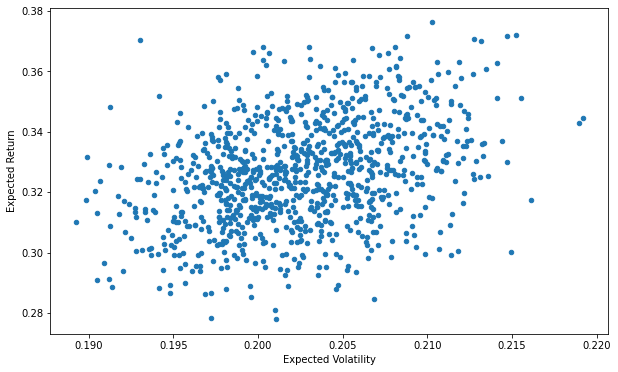

In [11]:
pf_data = pd.DataFrame()
for t in df1["Ticker"]:
    pf_data[t] = web.DataReader(t, data_source = 'yahoo', start = '2019-1-1')['Adj Close']

log_returns = np.log(pf_data / pf_data.shift(1))
num_assets = len(df1["Ticker"])
num_assets
weights = np.random.random(num_assets)
weights /= np.sum(weights)
np.sum(weights * log_returns.mean()) * 252
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
pfolio_returns = []
pfolio_volatilities = []
wts = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
    wts.append(weights)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
wts= np.array(wts)
#pfolio_returns, pfolio_volatilities
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [12]:
df = pd.DataFrame(data=wts)
df.columns = df1["Ticker"]
df_col_merged = pd.concat([portfolios, df], axis=1)
dft = df_col_merged.loc[df_col_merged['Return'].argmax()]
dft*100

Return           37.622673
Volatility       21.024144
PGHH.NS           1.694873
HINDUNILVR.NS     1.326953
VINATIORGA.NS     0.202754
GRINDWELL.NS      1.882178
ALKYLAMINE.NS     0.934021
ESABINDIA.NS      4.307869
SUMICHEM.NS       1.017536
SCHAEFFLER.NS     0.726217
IEX.NS            0.179612
TCIEXP.NS         3.094901
LINDEINDIA.NS     3.264922
SKFINDIA.NS       4.004823
FCL.NS            4.186807
INGERRAND.NS      1.695993
PRAJIND.NS        3.302747
TIPSINDLTD.NS     5.050774
CDSL.NS           4.567719
DIVISLAB.NS       3.508775
AMRUTANJAN.NS     1.957151
POLYCAB.NS        2.249718
JBCHEPHARM.NS     0.862656
ADFFOODS.NS       2.819808
KSB.NS            2.603409
TANLA.NS          4.205909
COFORGE.NS        4.455702
INTELLECT.NS      3.998817
SUPREMEIND.NS     1.935423
BEL.NS            0.194213
AJANTPHARM.NS     0.892428
EXPLEOSOL.NS      3.405228
AVANTIFEED.NS     0.165865
ADORWELD.NS       1.986388
PRIMESECU.NS      0.232934
RSYSTEMS.NS       3.846205
CAPLIPOINT.NS     0.331658
S

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

if __name__ == "__main__":
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation

    #historical data to approximate mean and standard deviation
    d = {}

    #download stock related data from Yahoo Finance
    for t in df1["Ticker"]:
        citi = web.DataReader(t,data_source='yahoo',start='2017-1-1')
           #we can use pct_change() to calculate daily returns
        citi['returns'] = citi['Adj Close'].pct_change()

    #we can assume daily returns to be normally sidtributed: mean and variance (standard deviation)
    #can describe the process
        mu = np.mean(citi['returns'])
        sigma = np.std(citi['returns'])

        model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
        val = model.simulation()
        d[t] = val
        print("VALUE AT RSIK for {} is".format(t))
        print('Value at risk with Monte-Carlo simulation in INR: %0.2f' % val)
    print("The minimum value at risk for the portofolios are:")
    print(min(d.values()))

VALUE AT RSIK for PGHH.NS is
Value at risk with Monte-Carlo simulation in INR: 15061.71
VALUE AT RSIK for HINDUNILVR.NS is
Value at risk with Monte-Carlo simulation in INR: 1820.73
VALUE AT RSIK for VINATIORGA.NS is
Value at risk with Monte-Carlo simulation in INR: 567.49
VALUE AT RSIK for GRINDWELL.NS is
Value at risk with Monte-Carlo simulation in INR: -4380.96
VALUE AT RSIK for ALKYLAMINE.NS is
Value at risk with Monte-Carlo simulation in INR: -52339.00
VALUE AT RSIK for ESABINDIA.NS is
Value at risk with Monte-Carlo simulation in INR: 20367.23
VALUE AT RSIK for SUMICHEM.NS is
Value at risk with Monte-Carlo simulation in INR: 12990.35
VALUE AT RSIK for SCHAEFFLER.NS is
Value at risk with Monte-Carlo simulation in INR: 8001.94
VALUE AT RSIK for IEX.NS is
Value at risk with Monte-Carlo simulation in INR: 24704.86
VALUE AT RSIK for TCIEXP.NS is
Value at risk with Monte-Carlo simulation in INR: 23587.94
VALUE AT RSIK for LINDEINDIA.NS is
Value at risk with Monte-Carlo simulation in INR:

In [14]:
for key,value in d.items():
    print(" The Value at risk per 1L invested in stock {} is {:0.2f}".format(key,value))

 The Value at risk per 1L invested in stock PGHH.NS is 15061.71
 The Value at risk per 1L invested in stock HINDUNILVR.NS is 1820.73
 The Value at risk per 1L invested in stock VINATIORGA.NS is 567.49
 The Value at risk per 1L invested in stock GRINDWELL.NS is -4380.96
 The Value at risk per 1L invested in stock ALKYLAMINE.NS is -52339.00
 The Value at risk per 1L invested in stock ESABINDIA.NS is 20367.23
 The Value at risk per 1L invested in stock SUMICHEM.NS is 12990.35
 The Value at risk per 1L invested in stock SCHAEFFLER.NS is 8001.94
 The Value at risk per 1L invested in stock IEX.NS is 24704.86
 The Value at risk per 1L invested in stock TCIEXP.NS is 23587.94
 The Value at risk per 1L invested in stock LINDEINDIA.NS is -3660.89
 The Value at risk per 1L invested in stock SKFINDIA.NS is 12343.06
 The Value at risk per 1L invested in stock FCL.NS is 63785.61
 The Value at risk per 1L invested in stock INGERRAND.NS is 24129.45
 The Value at risk per 1L invested in stock PRAJIND.NS

In [15]:
df2.reset_index(inplace = True)

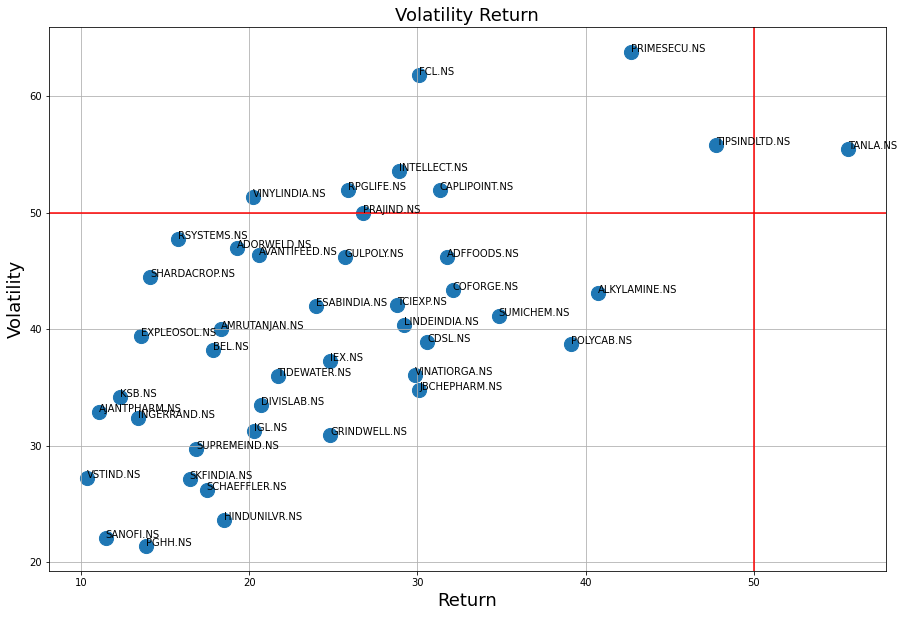

In [16]:

plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Volatility%']
annotations = np.array(df2["Ticker"])
plt.grid(True)
plt.title('Volatility Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Volatility", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
i=0
for labels in annotations:
    plt.annotate(labels, (x[i], y[i]))
    i=i+1
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

In [30]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Read in price data
df = data

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

ModuleNotFoundError: No module named 'pypfopt'

In [19]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=700000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: INR{:.2f}".format(leftover))

ModuleNotFoundError: No module named 'pypfopt'

In [20]:
df2

,index,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
0,32,TANLA.NS,0.02503,0.032572,0.768453,55.52482,55.57964,99.901366,0.910937,74.280769,56.960481,32435.337833
1,19,TIPSINDLTD.NS,0.01843,0.032572,0.565816,55.804354,47.774559,116.807681,0.766509,61.202088,64.789129,46418.176812
2,45,PRIMESECU.NS,0.02818,0.032572,0.865161,63.824334,42.66948,149.57842,0.590206,53.183333,59.472419,68372.941435
3,6,ALKYLAMINE.NS,0.028812,0.032572,0.884575,43.122202,40.724386,105.887912,0.828445,50.234135,45.536652,25473.15048
4,26,POLYCAB.NS,0.046025,0.032572,1.413037,38.746019,39.156995,98.95044,0.881561,18.453503,49.828919,16834.886161
5,8,SUMICHEM.NS,0.04768,0.032572,1.463853,41.174357,34.82868,118.219688,0.724448,12.233198,41.454014,32480.926515
6,33,COFORGE.NS,0.032541,0.032572,0.999059,43.364916,32.096869,135.106376,0.624857,37.822444,56.758068,42954.142743
7,30,ADFFOODS.NS,0.031292,0.032572,0.960711,46.173523,31.749611,145.430198,0.579328,37.344932,62.070967,49518.909059
8,50,CAPLIPOINT.NS,0.029114,0.032572,0.893847,51.936693,31.328936,165.778671,0.506943,36.768678,74.085833,60546.514172
9,20,CDSL.NS,0.029663,0.032572,0.910694,38.878321,30.595262,127.073011,0.658343,22.76056,57.607431,34362.387069


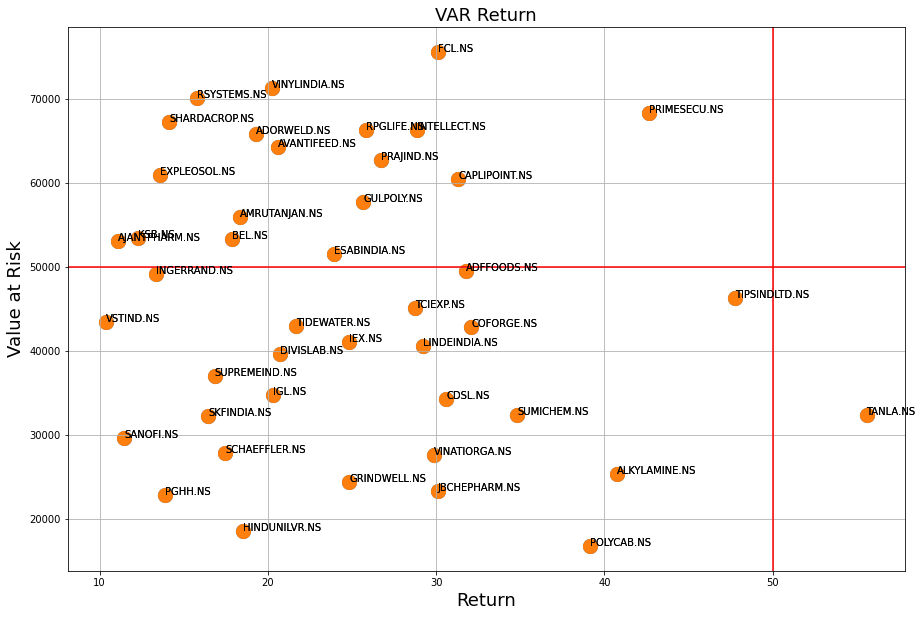

In [21]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

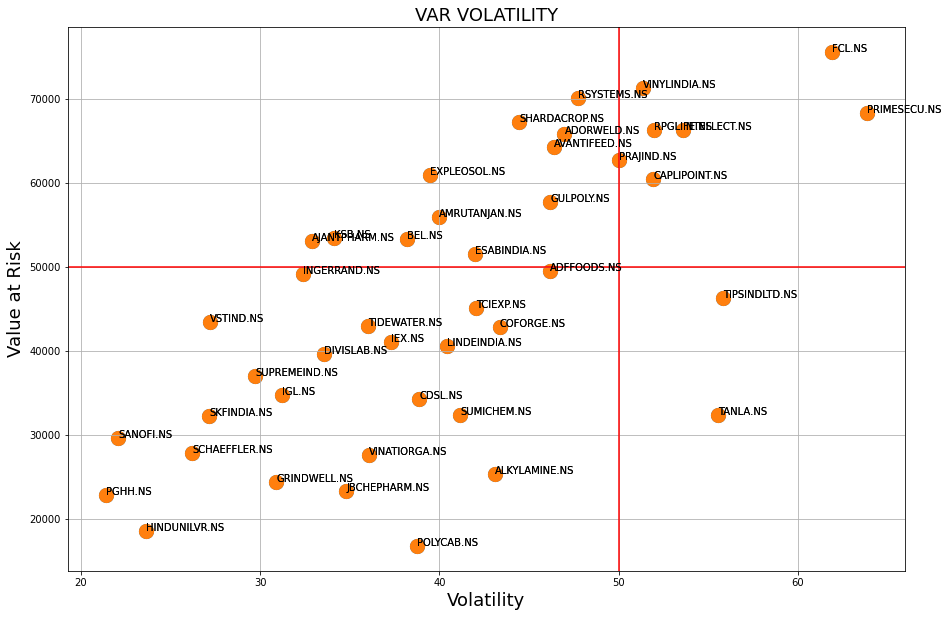

In [22]:
plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

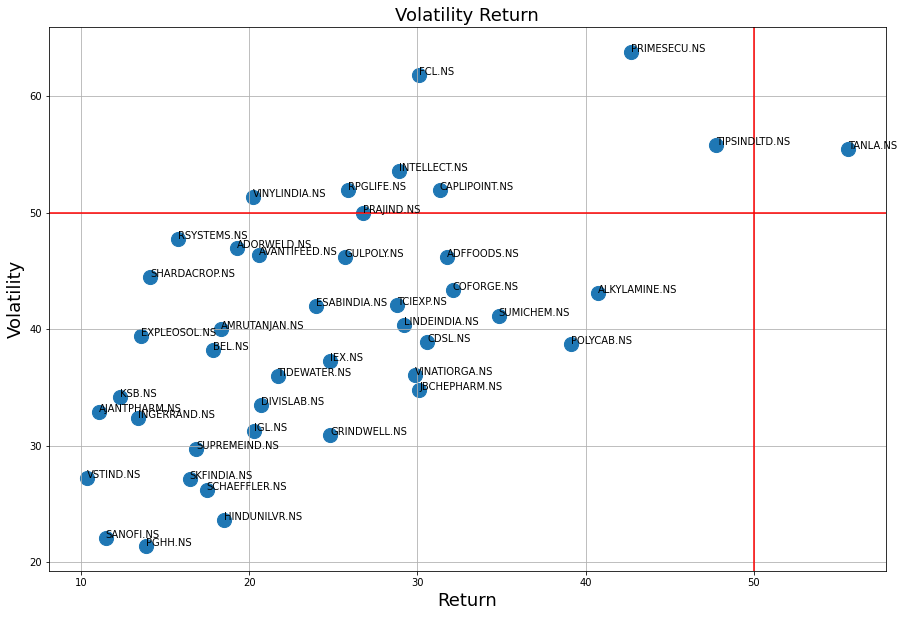

In [23]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Volatility%']
annotations = np.array(df2["Ticker"])
plt.grid(True)
plt.title('Volatility Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Volatility", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
i=0
for labels in annotations:
    plt.annotate(labels, (x[i], y[i]))
    i=i+1
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

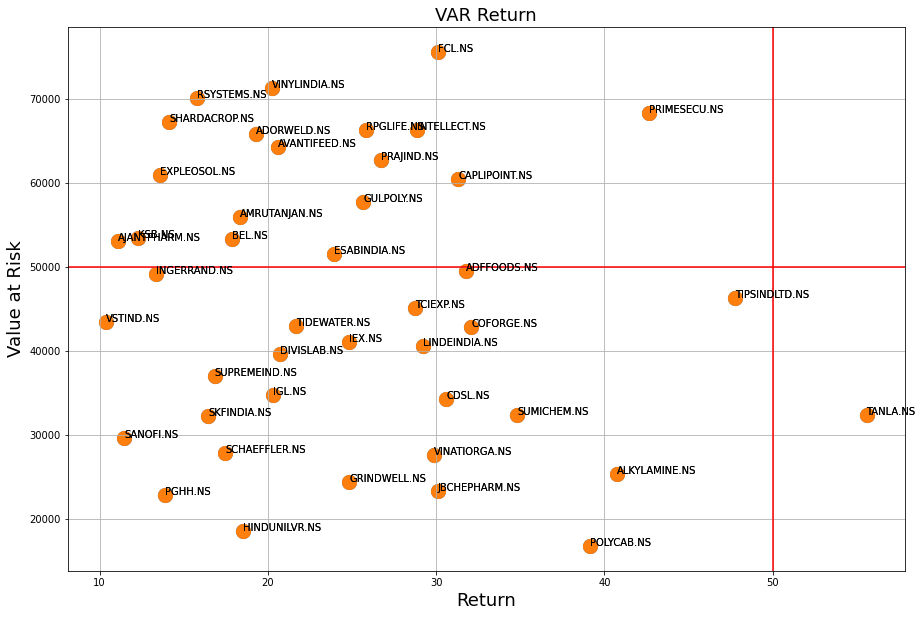

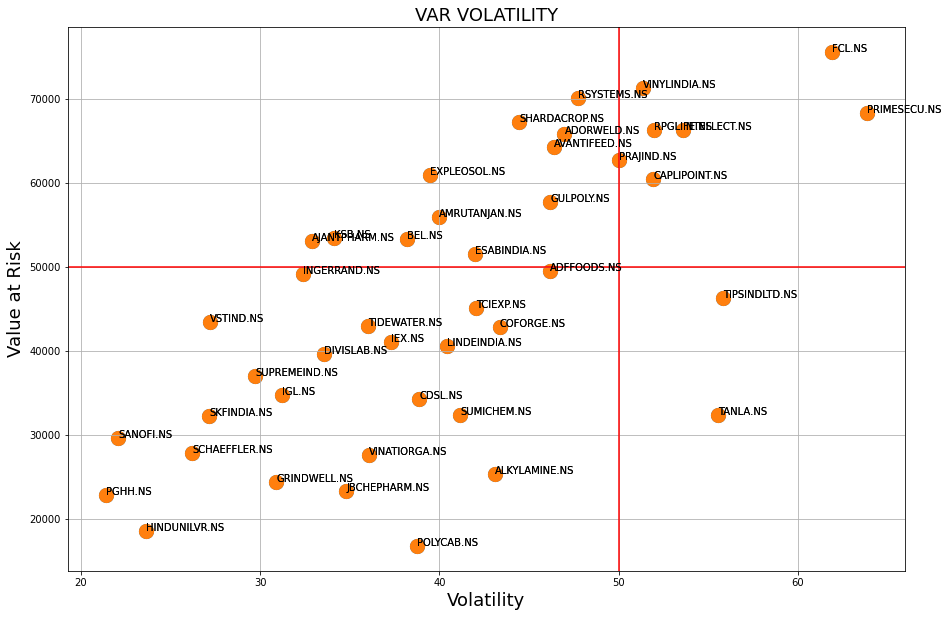

In [24]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

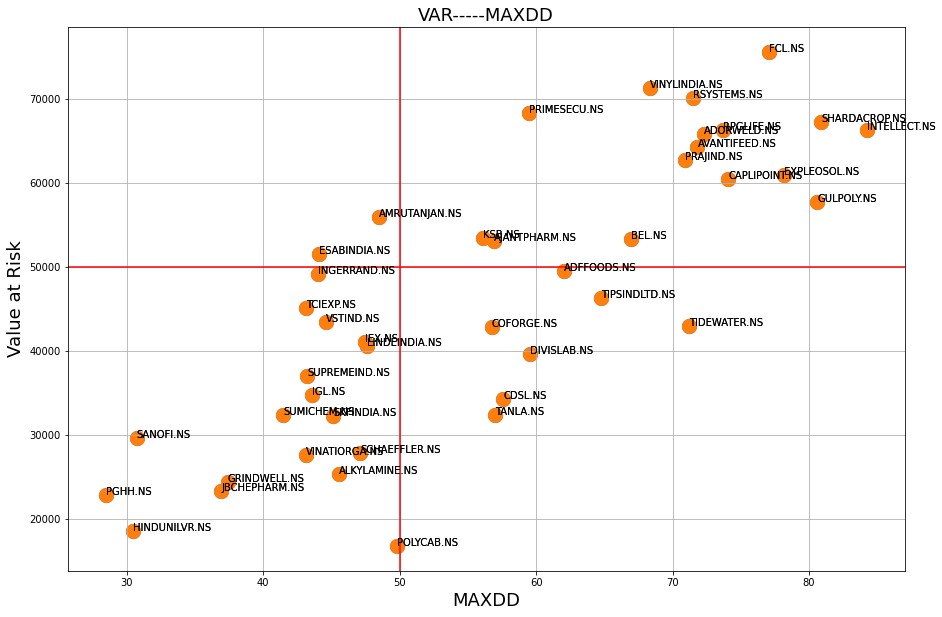

In [25]:

plt.figure(figsize=[15,10])
x= df2['MAXDD%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR-----MAXDD', fontsize=18, color='black')
plt.xlabel("MAXDD",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

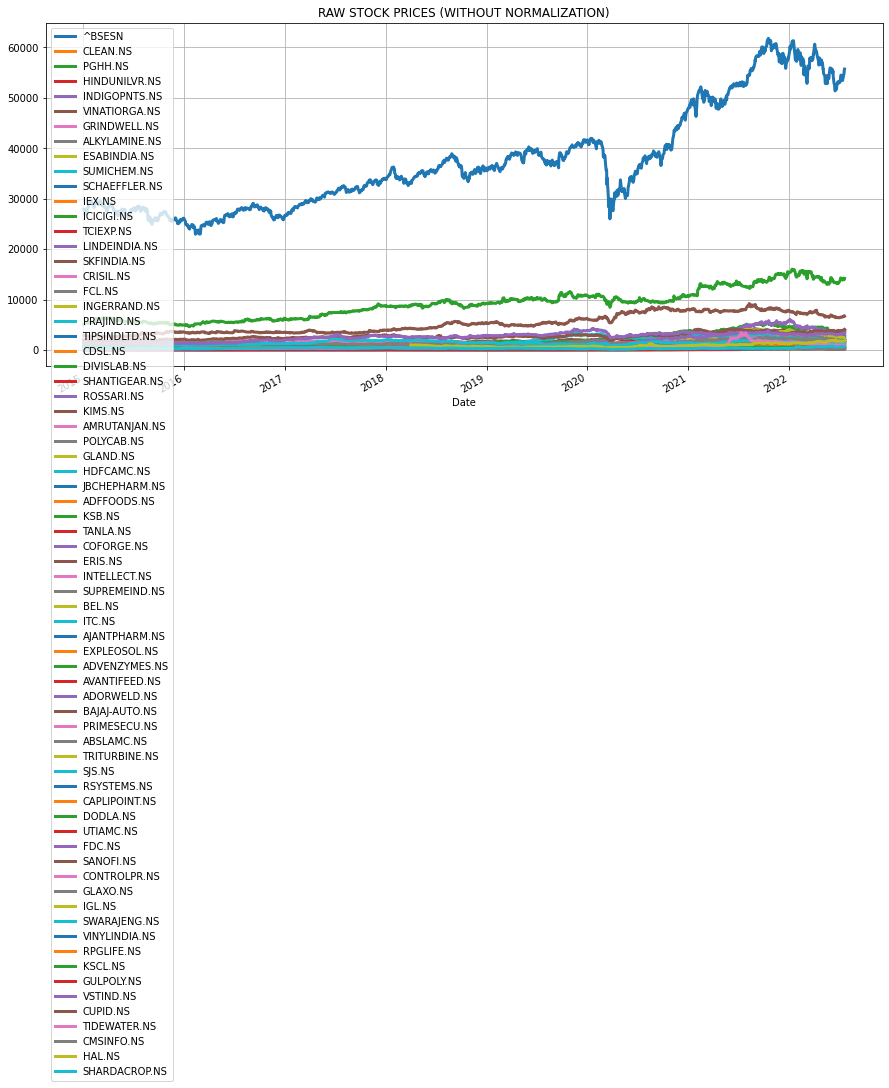

In [26]:
stocks_df = data
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()
stocks_df = stocks_df.reset_index()
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3603397841.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
/var/folders/jx/qw4vpgyd2gxg8zhm3nm041j40000gp/T/ipykernel_23891/3603397841.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][0] = 0


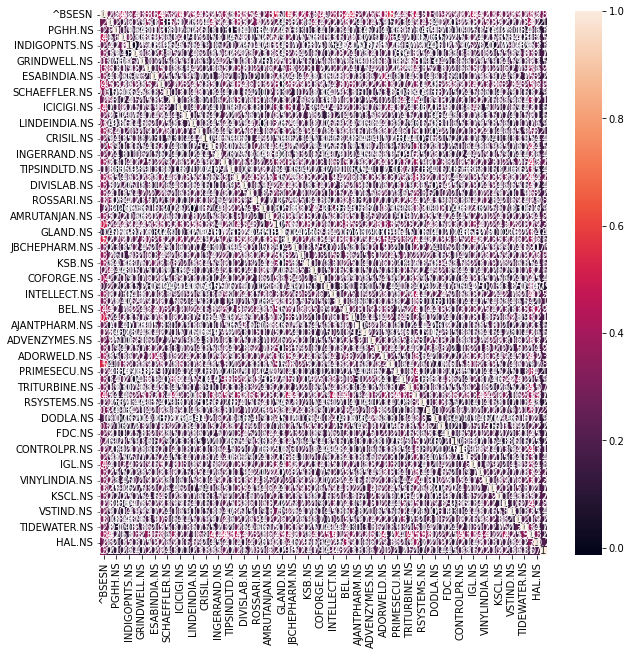

In [27]:
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

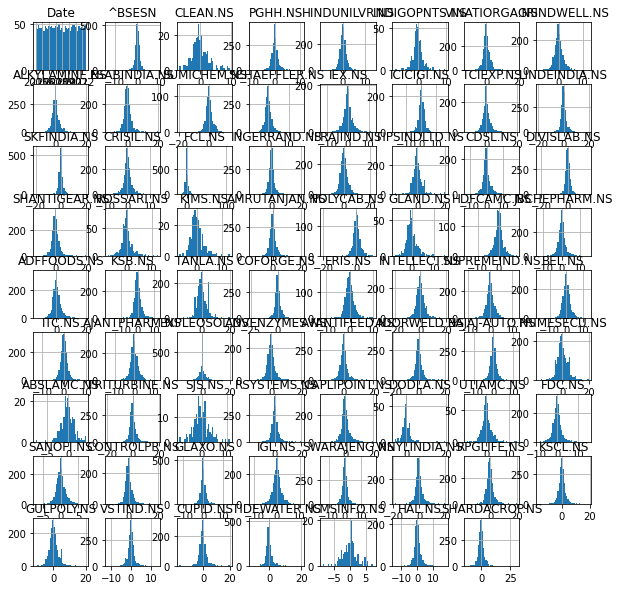

In [28]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

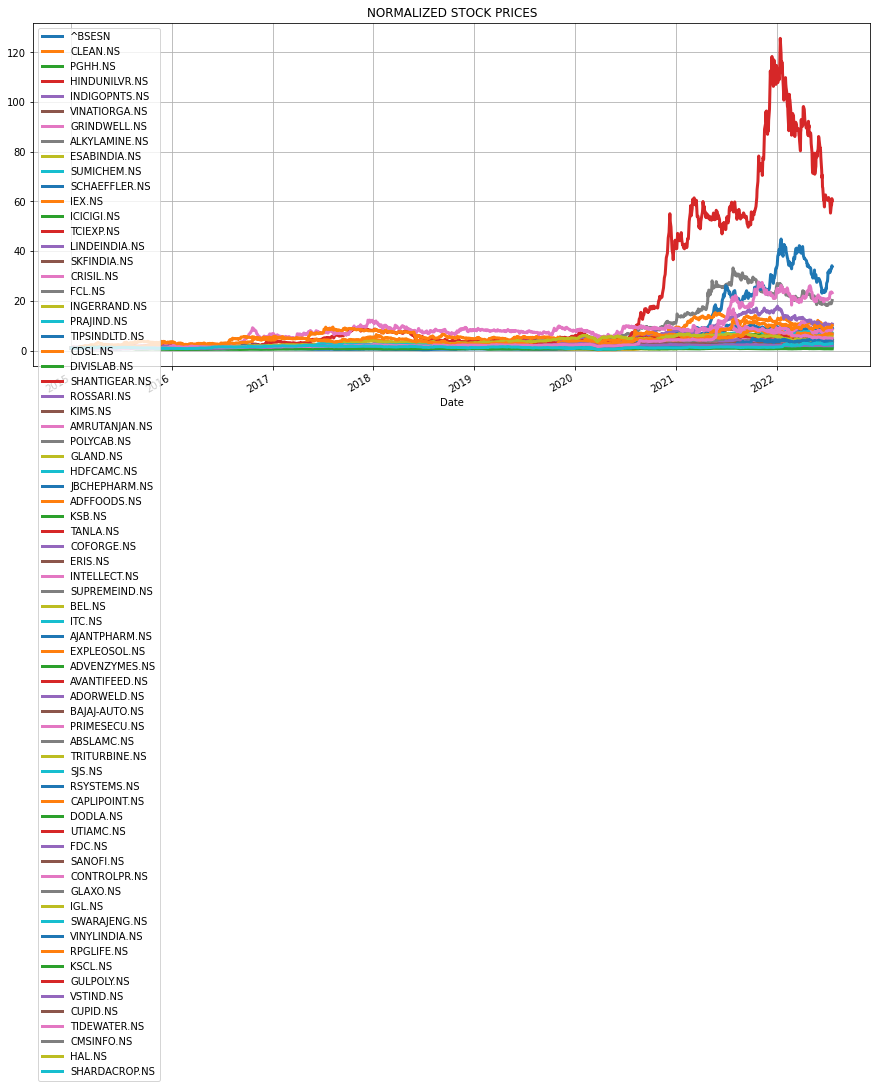

In [29]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')